<a href="https://colab.research.google.com/github/phanng0605/Polynomial_Regression/blob/main/Polynomial_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data_full = pd.read_csv('/content/dataset_final.csv')

In [ ]:
data_full

,Year,Week_ID,Start_week,End_week,Iphone_13,Iphone_14,Galaxy_S21,Galaxy_S22,Galaxy_S23,NumHoliday,ReleaseStat13,ReleaseState14,ReleaseStat21,ReleaseStat22,ReleaseStat23,Campaign_Iphone,Campaign_Samsung
0,2022.0,1.0,02-Jan,08-Jan,52360.0,0.0,25630.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,100.000000,100.000000
1,2022.0,2.0,09-Jan,15-Jan,50360.0,0.0,22940.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,600.000000,600.000000
2,2022.0,3.0,16-Jan,22-Jan,48340.0,0.0,21560.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,350.000000,200.000000
3,2022.0,4.0,23-Jan,29-Jan,45390.0,0.0,22450.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,750.000000,750.000000
4,2022.0,5.0,30-Jan,05-Feb,66780.0,0.0,21460.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,900.000000,500.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,2023.0,10.0,05-Mar,11-Mar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,448.214286,357.142857
62,2023.0,11.0,12-Mar,18-Mar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,521.230159,648.015873
63,2023.0,12.0,19-Mar,25-Mar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,90.277778,304.563492
64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
new_data = data_full[:-2]

In [ ]:
new_data 

,Year,Week_ID,Start_week,End_week,Iphone_13,Iphone_14,Galaxy_S21,Galaxy_S22,Galaxy_S23,NumHoliday,ReleaseStat13,ReleaseState14,ReleaseStat21,ReleaseStat22,ReleaseStat23,Campaign_Iphone,Campaign_Samsung
0,2022.0,1.0,02-Jan,08-Jan,52360.0,0.0,25630.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,100.000000,100.000000
1,2022.0,2.0,09-Jan,15-Jan,50360.0,0.0,22940.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,600.000000,600.000000
2,2022.0,3.0,16-Jan,22-Jan,48340.0,0.0,21560.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,350.000000,200.000000
3,2022.0,4.0,23-Jan,29-Jan,45390.0,0.0,22450.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,750.000000,750.000000
4,2022.0,5.0,30-Jan,05-Feb,66780.0,0.0,21460.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,900.000000,500.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,2023.0,8.0,19-Feb,25-Feb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,335.813492,433.531746
60,2023.0,9.0,26-Feb,04-Mar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,425.000000,192.857143
61,2023.0,10.0,05-Mar,11-Mar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,448.214286,357.142857
62,2023.0,11.0,12-Mar,18-Mar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,521.230159,648.015873


In [ ]:
new_data.drop(columns = ['Start_week', 'End_week', 'NumHoliday'])

,Year,Week_ID,Iphone_13,Iphone_14,Galaxy_S21,Galaxy_S22,Galaxy_S23,ReleaseStat13,ReleaseState14,ReleaseStat21,ReleaseStat22,ReleaseStat23,Campaign_Iphone,Campaign_Samsung
0,2022.0,1.0,52360.0,0.0,25630.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,100.000000,100.000000
1,2022.0,2.0,50360.0,0.0,22940.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,600.000000,600.000000
2,2022.0,3.0,48340.0,0.0,21560.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,350.000000,200.000000
3,2022.0,4.0,45390.0,0.0,22450.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,750.000000,750.000000
4,2022.0,5.0,66780.0,0.0,21460.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,900.000000,500.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,2023.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,335.813492,433.531746
60,2023.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,425.000000,192.857143
61,2023.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,448.214286,357.142857
62,2023.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,521.230159,648.015873


In [ ]:
iphone_data = new_data[['Iphone_13', 'Iphone_14', 'ReleaseStat13','ReleaseState14','Campaign_Iphone']]

In [ ]:
iphone_data

,Iphone_13,Iphone_14,ReleaseStat13,ReleaseState14,Campaign_Iphone
0,52360.0,0.0,1.0,0.0,100.000000
1,50360.0,0.0,1.0,0.0,600.000000
2,48340.0,0.0,1.0,0.0,350.000000
3,45390.0,0.0,1.0,0.0,750.000000
4,66780.0,0.0,1.0,0.0,900.000000
...,...,...,...,...,...
59,0.0,0.0,0.0,1.0,335.813492
60,0.0,0.0,0.0,1.0,425.000000
61,0.0,0.0,0.0,1.0,448.214286
62,0.0,0.0,0.0,1.0,521.230159


In [ ]:
iphone_13_14 = iphone_data[['Iphone_13','Iphone_14']]

In [ ]:
iphone_13_14 

,Iphone_13,Iphone_14
0,52360.0,0.0
1,50360.0,0.0
2,48340.0,0.0
3,45390.0,0.0
4,66780.0,0.0
...,...,...
59,0.0,0.0
60,0.0,0.0
61,0.0,0.0
62,0.0,0.0


In [ ]:
iphone_13_14.drop(iphone_13_14.loc[iphone_13_14['Iphone_13']==0].index, inplace=True)


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
iphone_13_14

,Iphone_13,Iphone_14
0,52360.0,0.0
1,50360.0,0.0
2,48340.0,0.0
3,45390.0,0.0
4,66780.0,0.0
5,57400.0,0.0
6,49490.0,0.0
7,54230.0,0.0
8,45060.0,0.0
9,46270.0,0.0


In [ ]:
iphone_13 = iphone_13_14['Iphone_13']

In [ ]:
iphone_13

0     52360.0
1     50360.0
2     48340.0
3     45390.0
4     66780.0
5     57400.0
6     49490.0
7     54230.0
8     45060.0
9     46270.0
10    54460.0
11    50720.0
12    50110.0
13    54040.0
14    48400.0
15    50490.0
16    46080.0
17    51990.0
18    48180.0
19    48860.0
20    50950.0
21    46470.0
22    49890.0
23    52290.0
24    51530.0
25    45590.0
26    53090.0
27    51780.0
28    53980.0
29    49170.0
30    54260.0
31    54350.0
32    37240.0
33    38320.0
34    32340.0
35    33200.0
36    39130.0
37    36350.0
38    32950.0
39    33100.0
40    36280.0
41    33480.0
42    32130.0
43    36890.0
44    26710.0
45    15630.0
46    11480.0
47     5790.0
Name: Iphone_13, dtype: float64

In [ ]:
import matplotlib.pyplot as plt

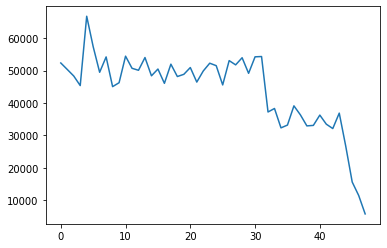

In [ ]:
plt.plot(iphone_13)

In [ ]:
iphone_gb = iphone_data['Campaign_Iphone']

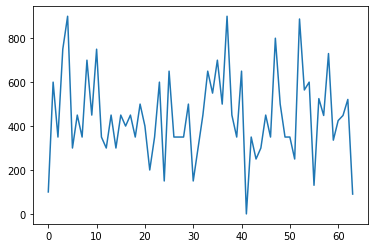

In [ ]:
plt.plot(iphone_gb)

In [ ]:
iphone_gb_13 = iphone_gb[:48]

In [ ]:
iphone_gb_13 

0     100.0
1     600.0
2     350.0
3     750.0
4     900.0
5     300.0
6     450.0
7     350.0
8     700.0
9     450.0
10    750.0
11    350.0
12    300.0
13    450.0
14    300.0
15    450.0
16    400.0
17    450.0
18    350.0
19    500.0
20    400.0
21    200.0
22    350.0
23    600.0
24    150.0
25    650.0
26    350.0
27    350.0
28    350.0
29    500.0
30    150.0
31    300.0
32    450.0
33    650.0
34    550.0
35    700.0
36    500.0
37    900.0
38    450.0
39    350.0
40    650.0
41      0.0
42    350.0
43    250.0
44    300.0
45    450.0
46    350.0
47    800.0
Name: Campaign_Iphone, dtype: float64

In [ ]:
iphone_13

0     52360.0
1     50360.0
2     48340.0
3     45390.0
4     66780.0
5     57400.0
6     49490.0
7     54230.0
8     45060.0
9     46270.0
10    54460.0
11    50720.0
12    50110.0
13    54040.0
14    48400.0
15    50490.0
16    46080.0
17    51990.0
18    48180.0
19    48860.0
20    50950.0
21    46470.0
22    49890.0
23    52290.0
24    51530.0
25    45590.0
26    53090.0
27    51780.0
28    53980.0
29    49170.0
30    54260.0
31    54350.0
32    37240.0
33    38320.0
34    32340.0
35    33200.0
36    39130.0
37    36350.0
38    32950.0
39    33100.0
40    36280.0
41    33480.0
42    32130.0
43    36890.0
44    26710.0
45    15630.0
46    11480.0
47     5790.0
Name: Iphone_13, dtype: float64

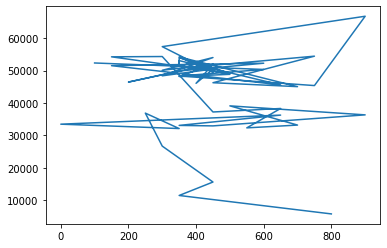

In [ ]:
plt.plot(iphone_gb_13,iphone_13)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model

LinearRegression()

In [ ]:
y = new_data['Week_ID']

In [ ]:
y = y[:48]

In [ ]:
y

0      1.0
1      2.0
2      3.0
3      4.0
4      5.0
5      6.0
6      7.0
7      8.0
8      9.0
9     10.0
10    11.0
11    12.0
12    13.0
13    14.0
14    15.0
15    16.0
16    17.0
17    18.0
18    19.0
19    20.0
20    21.0
21    22.0
22    23.0
23    24.0
24    25.0
25    26.0
26    27.0
27    28.0
28    29.0
29    30.0
30    31.0
31    32.0
32    33.0
33    34.0
34    35.0
35    36.0
36    37.0
37    38.0
38    39.0
39    40.0
40    41.0
41    42.0
42    43.0
43    44.0
44    45.0
45    46.0
46    47.0
47    48.0
Name: Week_ID, dtype: float64

In [ ]:
import numpy as np

In [ ]:
y.tolist()

[1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0]

In [ ]:
y = y.values.reshape(-1,1)

In [ ]:
iphone_13.tolist()

[52360.0,
 50360.0,
 48340.0,
 45390.0,
 66780.0,
 57400.0,
 49490.0,
 54230.0,
 45060.0,
 46270.0,
 54460.0,
 50720.0,
 50110.0,
 54040.0,
 48400.0,
 50490.0,
 46080.0,
 51990.0,
 48180.0,
 48860.0,
 50950.0,
 46470.0,
 49890.0,
 52290.0,
 51530.0,
 45590.0,
 53090.0,
 51780.0,
 53980.0,
 49170.0,
 54260.0,
 54350.0,
 37240.0,
 38320.0,
 32340.0,
 33200.0,
 39130.0,
 36350.0,
 32950.0,
 33100.0,
 36280.0,
 33480.0,
 32130.0,
 36890.0,
 26710.0,
 15630.0,
 11480.0,
 5790.0]

In [ ]:
model.fit(y,iphone_13)

LinearRegression()

In [ ]:
model.score(y,iphone_13)

0.5701262150680748

In [ ]:
model.predict(np.array([[49], [50],[51],[52]]))

array([28170.26595745, 27522.98089449, 26875.69583152, 26228.41076856])

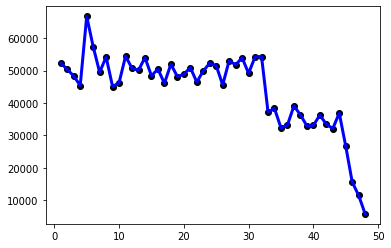

In [ ]:
plt.scatter(y, iphone_13, color="black")
plt.plot(y, iphone_13, color="blue", linewidth=3)


plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(degree=3)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

# Create linear regression object

X_train = poly.fit_transform(y)

model = linear_model.LinearRegression()
model.fit(X_train, iphone_13)

print(model.score(X_train, iphone_13))

0.8142580779444449


In [ ]:
model

LinearRegression()

In [ ]:
model.predict([[1,48,48**2,48**3]])

array([11998.71808724])

In [ ]:
model.predict([[1,49,49**2,49**3]])

array([8272.40697914])

In [ ]:
model.predict([[1,50,50**2,50**3]])

array([4315.83178106])

In [ ]:
prediction = model.predict([[1,49,49**2,49**3],[1,50,50**2,50**3],[1,51,51**2,51**3],[1,52,52**2,52**3],[1,53,53**2,53**3]])

In [ ]:
prediction = [i if i >0 else 0 for i in prediction]

In [ ]:
prediction

[8272.406979135128, 4315.83178106376, 122.14686472950416, 0, 0]

In [ ]:
prediction = [np.array([i]) if isinstance(i, (int, float)) else i for i in prediction]
prediction = np.concatenate(prediction)

In [ ]:
prediction

array([8272.40697914, 4315.83178106,  122.14686473,    0.        ,
          0.        ])

In [ ]:
prediction = np.append(prediction,0)

In [ ]:
iphone_13_new = np.append(iphone_13,prediction)

In [ ]:
iphone_13_new

array([52360.        , 50360.        , 48340.        , 45390.        ,
       66780.        , 57400.        , 49490.        , 54230.        ,
       45060.        , 46270.        , 54460.        , 50720.        ,
       50110.        , 54040.        , 48400.        , 50490.        ,
       46080.        , 51990.        , 48180.        , 48860.        ,
       50950.        , 46470.        , 49890.        , 52290.        ,
       51530.        , 45590.        , 53090.        , 51780.        ,
       53980.        , 49170.        , 54260.        , 54350.        ,
       37240.        , 38320.        , 32340.        , 33200.        ,
       39130.        , 36350.        , 32950.        , 33100.        ,
       36280.        , 33480.        , 32130.        , 36890.        ,
       26710.        , 15630.        , 11480.        ,  5790.        ,
        8272.40697914,  4315.83178106,   122.14686473,     0.        ,
           0.        ,     0.        ])

In [ ]:
y_new = [[48],[49],[50],[51],[52],[53],[54]]

In [ ]:
y_newnew = np.append(y,y_new)

In [ ]:
y_newnew = y_newnew[:54]

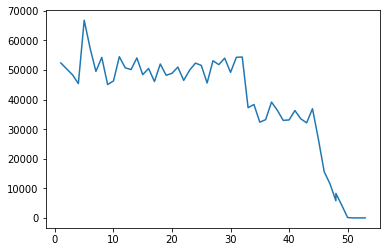

In [ ]:
plt.plot()
plt.plot(y_newnew,iphone_13_new)

In [ ]:
y = y_newnew[:48]

In [ ]:
y

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48.])

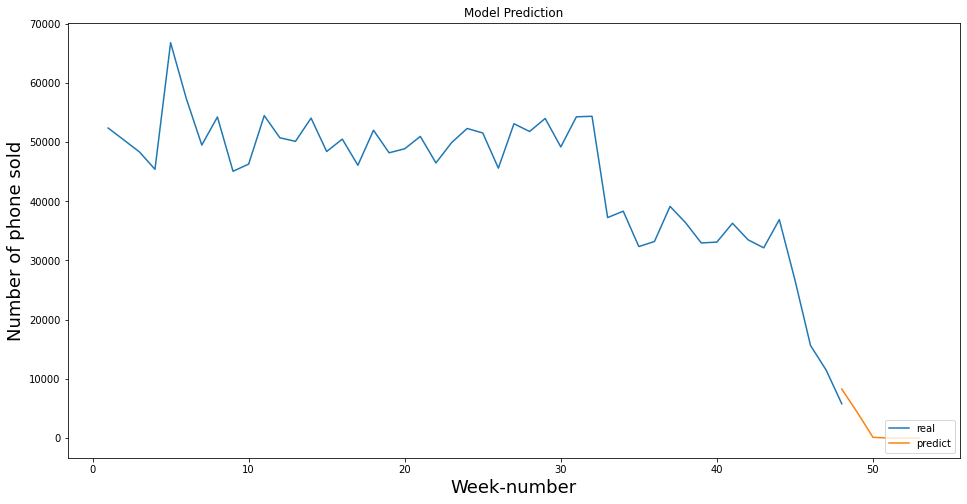

In [ ]:
plt.figure(figsize=(16,8))
plt.title('')
plt.title('Model Prediction')
plt.xlabel('Week-number', fontsize = 18)
plt.ylabel('Number of phone sold', fontsize = 18)
plt.plot(y,iphone_13)
plt.plot(y_new[:6],prediction)
plt.legend(['real','predict'], loc = 'lower right')
plt.show()

In [ ]:
y_train_last = []
for i in range(0,54):
    y_train_last.append([1,i,i**2,i**3])

In [ ]:
y_train_last

[[1, 0, 0, 0],
 [1, 1, 1, 1],
 [1, 2, 4, 8],
 [1, 3, 9, 27],
 [1, 4, 16, 64],
 [1, 5, 25, 125],
 [1, 6, 36, 216],
 [1, 7, 49, 343],
 [1, 8, 64, 512],
 [1, 9, 81, 729],
 [1, 10, 100, 1000],
 [1, 11, 121, 1331],
 [1, 12, 144, 1728],
 [1, 13, 169, 2197],
 [1, 14, 196, 2744],
 [1, 15, 225, 3375],
 [1, 16, 256, 4096],
 [1, 17, 289, 4913],
 [1, 18, 324, 5832],
 [1, 19, 361, 6859],
 [1, 20, 400, 8000],
 [1, 21, 441, 9261],
 [1, 22, 484, 10648],
 [1, 23, 529, 12167],
 [1, 24, 576, 13824],
 [1, 25, 625, 15625],
 [1, 26, 676, 17576],
 [1, 27, 729, 19683],
 [1, 28, 784, 21952],
 [1, 29, 841, 24389],
 [1, 30, 900, 27000],
 [1, 31, 961, 29791],
 [1, 32, 1024, 32768],
 [1, 33, 1089, 35937],
 [1, 34, 1156, 39304],
 [1, 35, 1225, 42875],
 [1, 36, 1296, 46656],
 [1, 37, 1369, 50653],
 [1, 38, 1444, 54872],
 [1, 39, 1521, 59319],
 [1, 40, 1600, 64000],
 [1, 41, 1681, 68921],
 [1, 42, 1764, 74088],
 [1, 43, 1849, 79507],
 [1, 44, 1936, 85184],
 [1, 45, 2025, 91125],
 [1, 46, 2116, 97336],
 [1, 47, 2209, 

In [ ]:
prediction_last = model.predict(y_train_last)

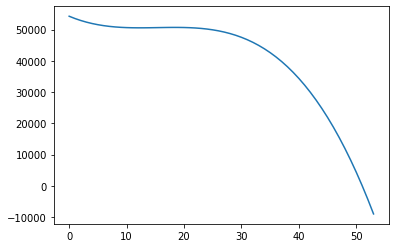

In [ ]:
plt.plot(prediction_last)

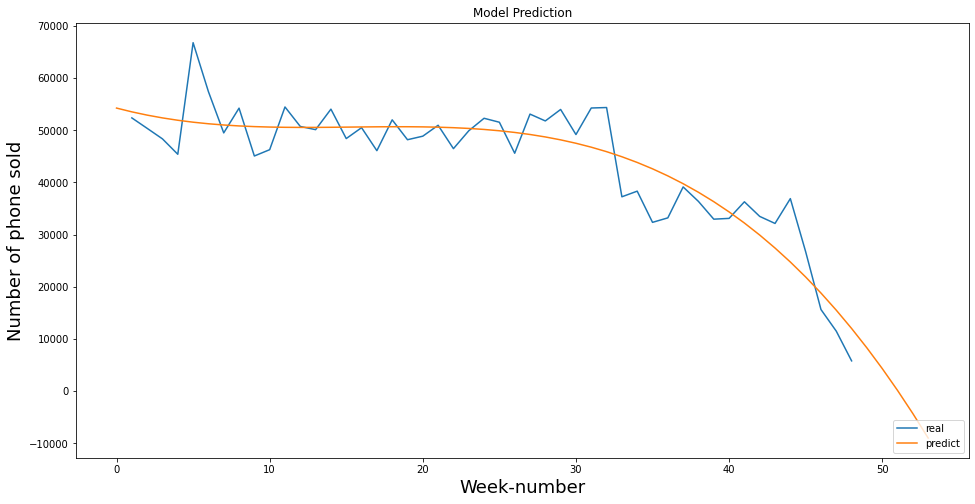

In [ ]:
plt.figure(figsize=(16,8))
plt.title('')
plt.title('Model Prediction')
plt.xlabel('Week-number', fontsize = 18)
plt.ylabel('Number of phone sold', fontsize = 18)
plt.plot(y,iphone_13)
plt.plot(prediction_last)
plt.legend(['real','predict'], loc = 'lower right')
plt.show()

In [ ]:
samsung_data = new_data.drop(columns = ['Iphone_13','Iphone_14','Start_week','End_week','NumHoliday','ReleaseStat13','ReleaseState14','Campaign_Iphone'])
samsung_data = samsung_data.drop(columns = ['Year'])

In [ ]:
samsung_data

,Week_ID,Galaxy_S21,Galaxy_S22,Galaxy_S23,ReleaseStat21,ReleaseStat22,ReleaseStat23,Campaign_Samsung
0,1.0,25630.0,0.0,0.0,1.0,0.0,0.0,100.000000
1,2.0,22940.0,0.0,0.0,1.0,0.0,0.0,600.000000
2,3.0,21560.0,0.0,0.0,1.0,0.0,0.0,200.000000
3,4.0,22450.0,0.0,0.0,1.0,0.0,0.0,750.000000
4,5.0,21460.0,0.0,0.0,1.0,0.0,0.0,500.000000
...,...,...,...,...,...,...,...,...
59,8.0,0.0,0.0,0.0,0.0,1.0,1.0,433.531746
60,9.0,0.0,0.0,0.0,0.0,1.0,1.0,192.857143
61,10.0,0.0,0.0,0.0,0.0,0.0,1.0,357.142857
62,11.0,0.0,0.0,0.0,0.0,0.0,1.0,648.015873


In [ ]:
campaign_samsung = samsung_data['Campaign_Samsung']

In [ ]:
campaign_samsung

0     100.000000
1     600.000000
2     200.000000
3     750.000000
4     500.000000
         ...    
59    433.531746
60    192.857143
61    357.142857
62    648.015873
63    304.563492
Name: Campaign_Samsung, Length: 64, dtype: float64

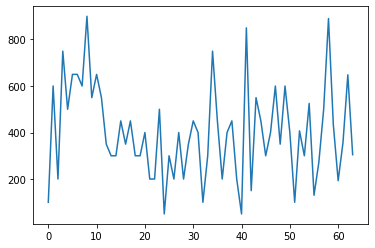

In [ ]:
plt.plot(campaign_samsung)

In [ ]:
s21 = samsung_data['Galaxy_S21']
s22 = samsung_data['Galaxy_S22']
s23 = samsung_data['Galaxy_S23']

In [ ]:
s21

0     25630.0
1     22940.0
2     21560.0
3     22450.0
4     21460.0
       ...   
59        0.0
60        0.0
61        0.0
62        0.0
63        0.0
Name: Galaxy_S21, Length: 64, dtype: float64

In [ ]:
column_names = ["s21", "s22", "campaign"]
X_train = pd.DataFrame(list(zip(s21,s22,campaign_samsung)), columns=column_names)

# Prepare dataset for s23

In [ ]:
X_train

,s21,s22,campaign
0,25630.0,0.0,100.000000
1,22940.0,0.0,600.000000
2,21560.0,0.0,200.000000
3,22450.0,0.0,750.000000
4,21460.0,0.0,500.000000
...,...,...,...
59,0.0,0.0,433.531746
60,0.0,0.0,192.857143
61,0.0,0.0,357.142857
62,0.0,0.0,648.015873


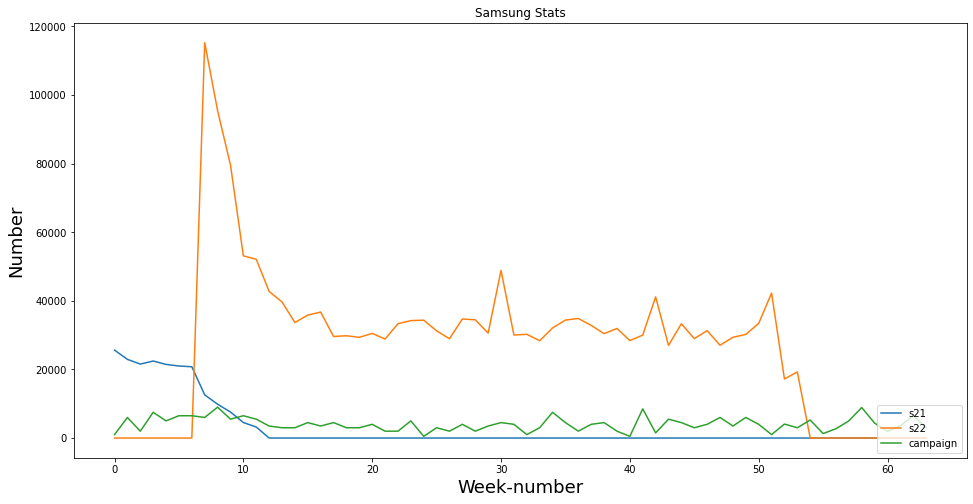

In [ ]:
plt.figure(figsize=(16,8))
plt.title('')
plt.title('Samsung Stats')
plt.xlabel('Week-number', fontsize = 18)
plt.ylabel('Number', fontsize = 18)
plt.plot(X_train['s21'])
plt.plot(X_train['s22'])
plt.plot(X_train['campaign']*10)
plt.legend(['s21','s22','campaign'], loc = 'lower right')
plt.show()

In [ ]:
s22_real = s22[7:54]

In [ ]:
week_num = [[i] for i in range(0,47)]

In [ ]:
week_num

[[0],
 [1],
 [2],
 [3],
 [4],
 [5],
 [6],
 [7],
 [8],
 [9],
 [10],
 [11],
 [12],
 [13],
 [14],
 [15],
 [16],
 [17],
 [18],
 [19],
 [20],
 [21],
 [22],
 [23],
 [24],
 [25],
 [26],
 [27],
 [28],
 [29],
 [30],
 [31],
 [32],
 [33],
 [34],
 [35],
 [36],
 [37],
 [38],
 [39],
 [40],
 [41],
 [42],
 [43],
 [44],
 [45],
 [46]]

In [ ]:
y_train_last_sem = []
for i in range(0,47):
    y_train_last_sem.append([1,i,i**2,i**3,i**4,i**5])

In [ ]:
y_train_last_sem

[[1, 0, 0, 0, 0, 0],
 [1, 1, 1, 1, 1, 1],
 [1, 2, 4, 8, 16, 32],
 [1, 3, 9, 27, 81, 243],
 [1, 4, 16, 64, 256, 1024],
 [1, 5, 25, 125, 625, 3125],
 [1, 6, 36, 216, 1296, 7776],
 [1, 7, 49, 343, 2401, 16807],
 [1, 8, 64, 512, 4096, 32768],
 [1, 9, 81, 729, 6561, 59049],
 [1, 10, 100, 1000, 10000, 100000],
 [1, 11, 121, 1331, 14641, 161051],
 [1, 12, 144, 1728, 20736, 248832],
 [1, 13, 169, 2197, 28561, 371293],
 [1, 14, 196, 2744, 38416, 537824],
 [1, 15, 225, 3375, 50625, 759375],
 [1, 16, 256, 4096, 65536, 1048576],
 [1, 17, 289, 4913, 83521, 1419857],
 [1, 18, 324, 5832, 104976, 1889568],
 [1, 19, 361, 6859, 130321, 2476099],
 [1, 20, 400, 8000, 160000, 3200000],
 [1, 21, 441, 9261, 194481, 4084101],
 [1, 22, 484, 10648, 234256, 5153632],
 [1, 23, 529, 12167, 279841, 6436343],
 [1, 24, 576, 13824, 331776, 7962624],
 [1, 25, 625, 15625, 390625, 9765625],
 [1, 26, 676, 17576, 456976, 11881376],
 [1, 27, 729, 19683, 531441, 14348907],
 [1, 28, 784, 21952, 614656, 17210368],
 [1, 29, 841

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

# Create linear regression object
poly_1 = PolynomialFeatures(degree=5)
X_train_hi = poly_1.fit_transform(week_num[:-2])

model_s22 = linear_model.LinearRegression()
model_s22.fit(X_train_hi, s22_real[:-2])

print(model_s22.score(X_train_hi, s22_real[:-2]))

0.9390535151225916


In [ ]:
prediction_s22 = model_s22.predict(y_train_last_sem)

In [ ]:
prediction_s22.reshape(-1,1)

array([[112548.87833117],
       [ 92988.22125124],
       [ 76942.38429848],
       [ 63970.73073653],
       [ 53667.39314652],
       [ 45659.96083236],
       [ 39608.16722604],
       [ 35202.57729292],
       [ 32163.27493701],
       [ 30238.55040627],
       [ 29203.58769791],
       [ 28859.15196367],
       [ 29030.2769151 ],
       [ 29564.9522289 ],
       [ 30332.81095214],
       [ 31223.81690762],
       [ 32146.95209911],
       [ 33028.90411667],
       [ 33812.75354193],
       [ 34456.66135339],
       [ 34932.55633172],
       [ 35224.82246501],
       [ 35328.98635411],
       [ 35250.40461791],
       [ 35002.95129859],
       [ 34607.70526698],
       [ 34091.63762781],
       [ 33486.29912498],
       [ 32826.50754692],
       [ 32149.03513181],
       [ 31491.29597292],
       [ 30890.03342388],
       [ 30380.00750397],
       [ 29992.68230344],
       [ 29754.91338874],
       [ 29687.63520788],
       [ 29804.54849569],
       [ 30110.80767911],
       [ 306

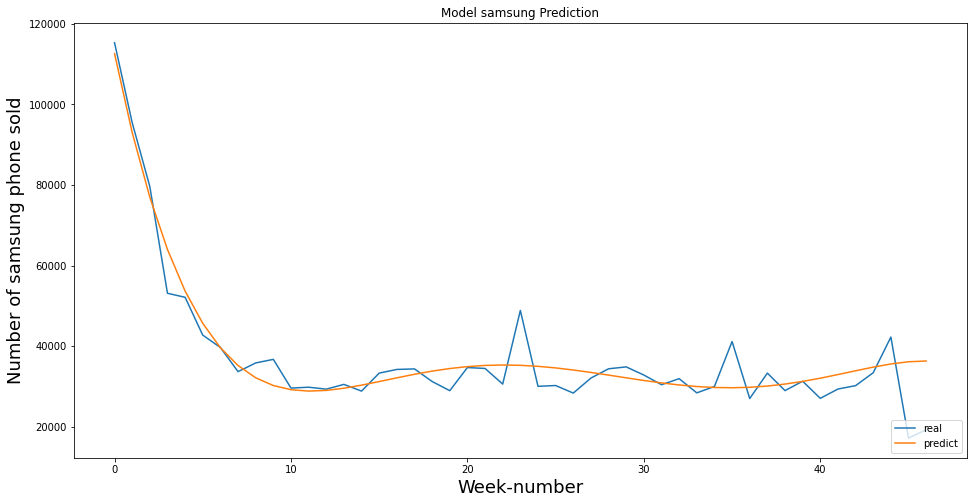

In [ ]:
plt.figure(figsize=(16,8))
plt.title('')
plt.title('Model samsung Prediction')
plt.xlabel('Week-number', fontsize = 18)
plt.ylabel('Number of samsung phone sold', fontsize = 18)
plt.plot(week_num,s22_real)
plt.plot(week_num,prediction_s22[0:47])
plt.legend(['real','predict'], loc = 'lower right')
plt.show()

In [ ]:
y_predict = []
for i in range(0,54):
    y_predict.append([1,i,i**2,i**3,i**4,i**5])

In [ ]:
prediction_s22_real = model_s22.predict(y_predict)

In [ ]:
week_num_after = [i for i in range(0,54)]

# S22 Prediction

In [ ]:
prediction_s22_real

array([112548.87833117,  92988.22125124,  76942.38429848,  63970.73073653,
        53667.39314652,  45659.96083236,  39608.16722604,  35202.57729292,
        32163.27493701,  30238.55040627,  29203.58769791,  28859.15196367,
        29030.2769151 ,  29564.9522289 ,  30332.81095214,  31223.81690762,
        32146.95209911,  33028.90411667,  33812.75354193,  34456.66135339,
        34932.55633172,  35224.82246501,  35328.98635411,  35250.40461791,
        35002.95129859,  34607.70526698,  34091.63762781,  33486.29912498,
        32826.50754692,  32149.03513181,  31491.29597292,  30890.03342388,
        30380.00750397,  29992.68230344,  29754.91338874,  29687.63520788,
        29804.54849569,  30110.80767911,  30601.70828248,  31261.37433284,
        32061.44576522,  32959.76582794,  33899.06848786,  34805.66583575,
        35588.13549149,  36136.00800944,  36318.45428368,  35982.97295332,
        34954.07780779,  33031.98519215,  29991.30141234,  25579.71014052,
        19516.65982031,  

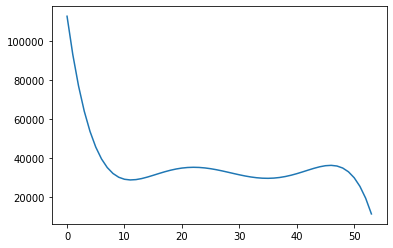

In [ ]:
plt.plot(prediction_s22_real)

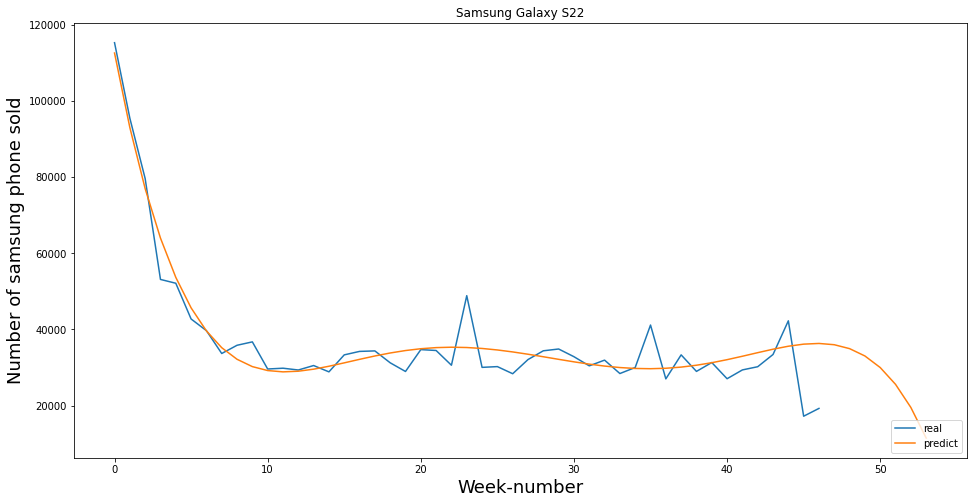

In [ ]:
plt.figure(figsize=(16,8))
plt.title('')
plt.title('Samsung Galaxy S22')
plt.xlabel('Week-number', fontsize = 18)
plt.ylabel('Number of samsung phone sold', fontsize = 18)
plt.plot(week_num,s22_real)
plt.plot(week_num_after,prediction_s22_real)
plt.legend(['real','predict'], loc = 'lower right')
plt.show()

# S23 Prediction


In [ ]:
column_names = ["s21", "s22", "campaign"]
X_train = pd.DataFrame(list(zip(s21,prediction_s22_real,campaign_samsung)), columns=column_names)

In [ ]:
X_train

,s21,s22,campaign
0,25630.0,112548.878331,100.000000
1,22940.0,92988.221251,600.000000
2,21560.0,76942.384298,200.000000
3,22450.0,63970.730737,750.000000
4,21460.0,53667.393147,500.000000
5,21000.0,45659.960832,650.000000
6,20780.0,39608.167226,650.000000
7,12580.0,35202.577293,600.000000
8,9860.0,32163.274937,900.000000
9,7580.0,30238.550406,550.000000


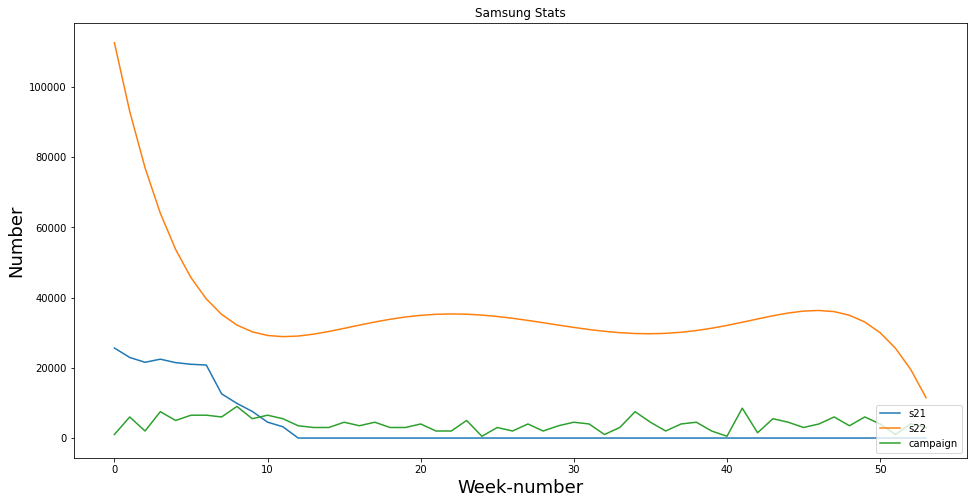

In [ ]:
plt.figure(figsize=(16,8))
plt.title('')
plt.title('Samsung Stats')
plt.xlabel('Week-number', fontsize = 18)
plt.ylabel('Number', fontsize = 18)
plt.plot(X_train['s21'])
plt.plot(X_train['s22'])
plt.plot(X_train['campaign']*10)
plt.legend(['s21','s22','campaign'], loc = 'lower right')
plt.show()

In [ ]:
y_predict_1 = []
for i in range(0,7):
    y_predict_1.append([1,i,i**2,i**3,i**4,i**5])

In [ ]:
s23 = model_s22.predict(y_predict_1)

In [ ]:
s23

array([112548.87833117,  92988.22125124,  76942.38429848,  63970.73073653,
        53667.39314652,  45659.96083236,  39608.16722604])

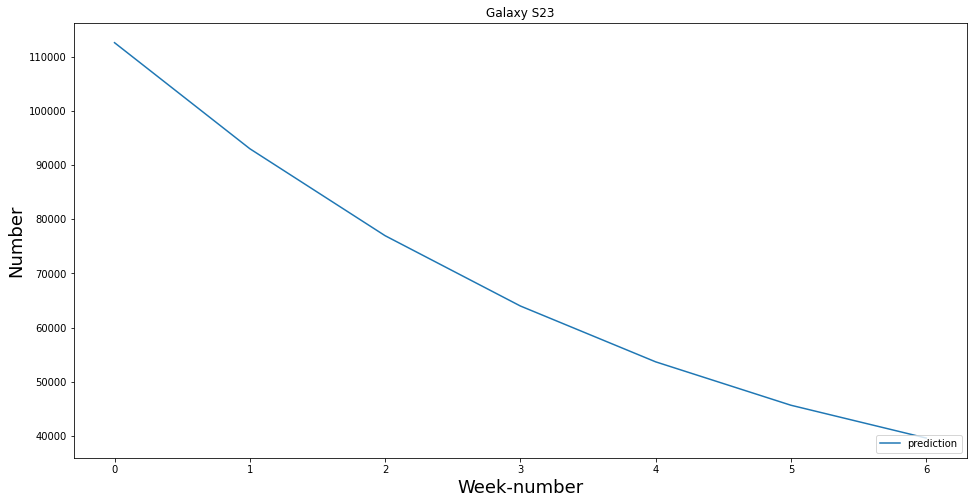

In [ ]:
plt.figure(figsize=(16,8))
plt.title('')
plt.title('Galaxy S23')
plt.xlabel('Week-number', fontsize = 18)
plt.ylabel('Number', fontsize = 18)
plt.plot(s23)
plt.legend(['prediction'], loc = 'lower right')
plt.show()

# Iphone 14

In [ ]:
iphone_data

,Iphone_13,Iphone_14,ReleaseStat13,ReleaseState14,Campaign_Iphone
0,52360.0,0.0,1.0,0.0,100.000000
1,50360.0,0.0,1.0,0.0,600.000000
2,48340.0,0.0,1.0,0.0,350.000000
3,45390.0,0.0,1.0,0.0,750.000000
4,66780.0,0.0,1.0,0.0,900.000000
...,...,...,...,...,...
59,0.0,0.0,0.0,1.0,335.813492
60,0.0,0.0,0.0,1.0,425.000000
61,0.0,0.0,0.0,1.0,448.214286
62,0.0,0.0,0.0,1.0,521.230159


In [ ]:
iphone_14 = iphone_data['Iphone_14']

In [ ]:
iphone_14

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
     ... 
59    0.0
60    0.0
61    0.0
62    0.0
63    0.0
Name: Iphone_14, Length: 64, dtype: float64

In [ ]:
iphone_14_real = iphone_14[37:54]

In [ ]:
iphone_14_real

37    188380.0
38    168930.0
39    142680.0
40    126960.0
41    108280.0
42     93110.0
43     77260.0
44     75390.0
45     72030.0
46     57210.0
47     59290.0
48     61810.0
49     63620.0
50     59030.0
51     90130.0
52     80280.0
53     69850.0
Name: Iphone_14, dtype: float64

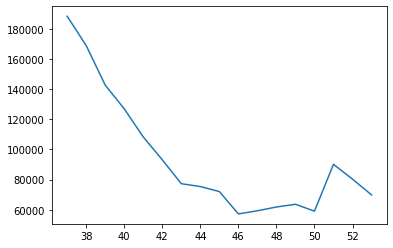

In [ ]:
plt.plot(iphone_14_real)

In [ ]:
week_num_iphone = [[i] for i in range(17)]


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

# Create linear regression object
poly_iphone = PolynomialFeatures(degree=4)
X_train_iphone = poly_iphone.fit_transform(week_num_iphone)

model_iphone14 = linear_model.LinearRegression()
model_iphone14.fit(X_train_iphone, iphone_14_real)

print(model_iphone14.score(X_train_iphone, iphone_14_real))

0.9783089164328537


In [ ]:
week_train_real=[]
for i in range(17):
  week_train_real.append([1,i,i**2,i**3,i**4])

In [ ]:
prediction_iphone14 = model_iphone14.predict(week_train_real)

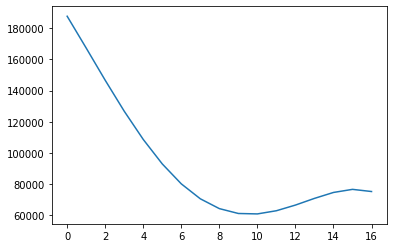

In [ ]:
plt.plot(prediction_iphone14)

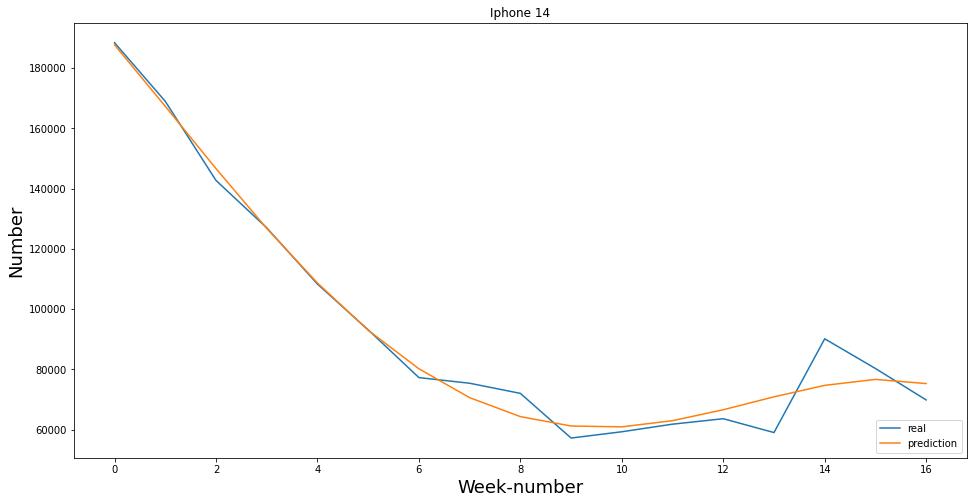

In [ ]:
plt.figure(figsize=(16,8))
plt.title('')
plt.title('Iphone 14')
plt.xlabel('Week-number', fontsize = 18)
plt.ylabel('Number', fontsize = 18)
plt.plot(week_num_iphone, iphone_14_real)
plt.plot(week_num_iphone, prediction_iphone14)
plt.legend(['real','prediction'], loc = 'lower right')
plt.show()

In [ ]:
week_predict = []
for i in range(27):
  week_predict.append([1,i,i**2,i**3])

In [ ]:
prediction_iphone14 = model_iphone14.predict(week_predict)

In [ ]:
week_number_iphone = [[i] for i in range(0,27)]

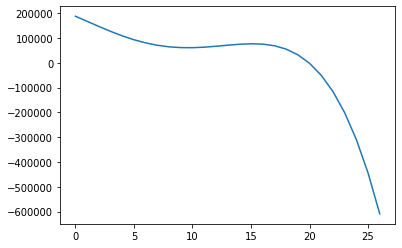

In [ ]:
plt.plot(prediction_iphone14)

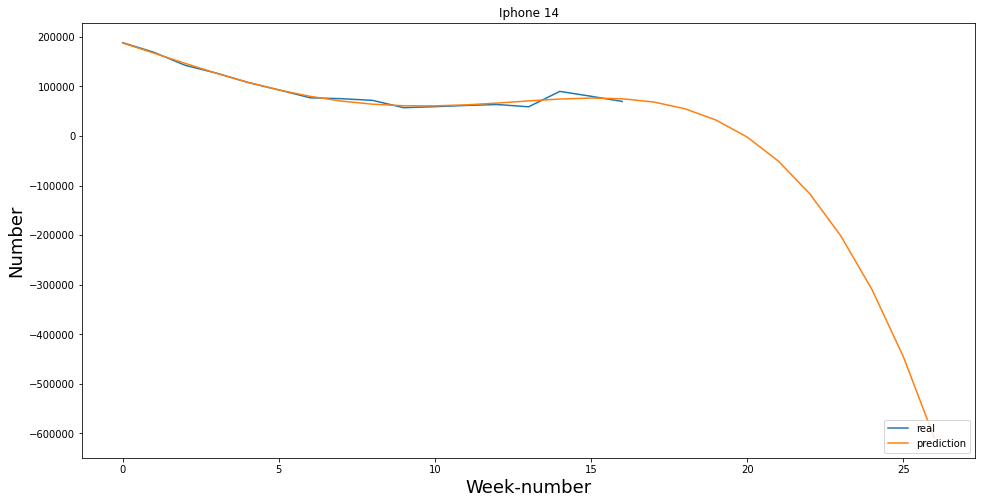